#### Generate a strace log for a given command

In [11]:
%%bash
strace -tt -T -r -o logs/mmarrays.st python src/mmarrays.py 100000

Data size = 819.200 MB
Chunk size = 0.800 MB


In [12]:
!ls -lh logs/*.st

-rw-r--r-- 1 vscode vscode 542K Jan 10 16:17 logs/mmarrays.st


#### Analyse the strace log

In [12]:
from src.strace_event_log import StraceEventLog
import pm4py

Report general IO statistics

In [13]:
st_log = "logs/mmarrays.st"

st = StraceEventLog(st_log)
tmp_csv= st_log.split('.')[0]+'.csv'
print(tmp_csv)
st.prepare_csv_log(tmp_csv)
el,stats = st.event_log_from_csv(tmp_csv)
stats

logs/mmarrays.csv


/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


,call,duration,percent
0,mmap,0.011478,0.574145
1,openat,0.726087,36.319859
2,read,0.023153,1.158145
3,write,1.074667,53.756304
4,others,0.163761,8.191548
5,Total,1.999146,100.000000


Mine for Directly-follows relation between the Io related system calls

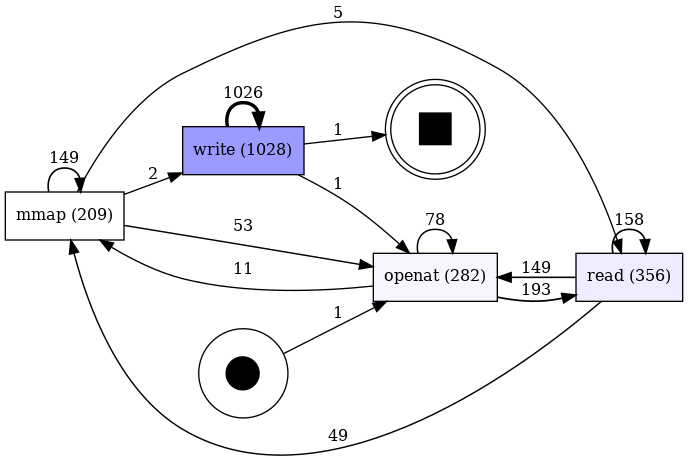

In [14]:
dfg,im,fm = pm4py.discover_dfg(el)
pm4py.view_dfg(dfg,im,fm)